In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


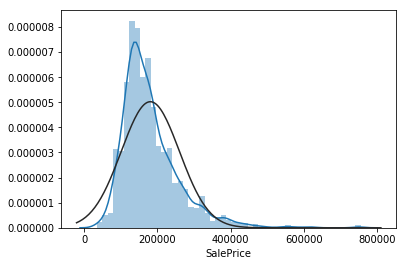

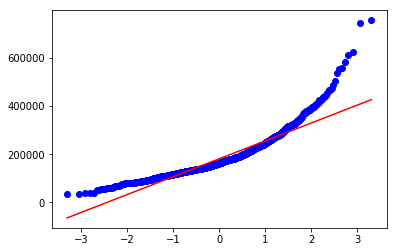

skewness: 1.882876
kurtosis: 6.536282


In [7]:
#kernel desnity plot
sns.distplot(train.SalePrice,fit=norm);
plt.ylabel =('Frequency')
plt.title = ('SalePrice Distribution');
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice']);
#QQ plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()
print("skewness: %f" % train['SalePrice'].skew())
print("kurtosis: %f" % train ['SalePrice'].kurt())

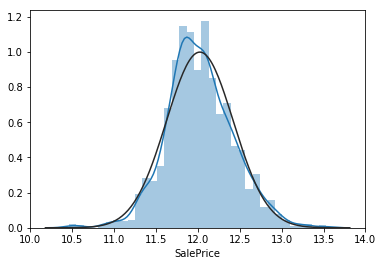

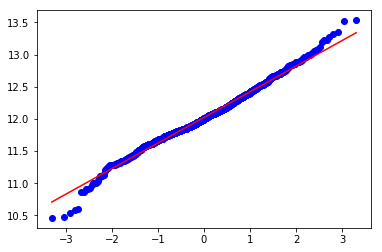

In [8]:
#log transform the target 
train["SalePrice"] = np.log1p(train["SalePrice"])

#Kernel Density plot
sns.distplot(train.SalePrice,fit=norm);
plt.ylabel=('Frequency')
plt.title=('SalePrice distribution');
#Get the fitted parameters used by the function
(mu,sigma)= norm.fit(train['SalePrice']);
#QQ plot
fig =plt.figure()
res =stats. probplot(train['SalePrice'], plot=plt)
plt.show()

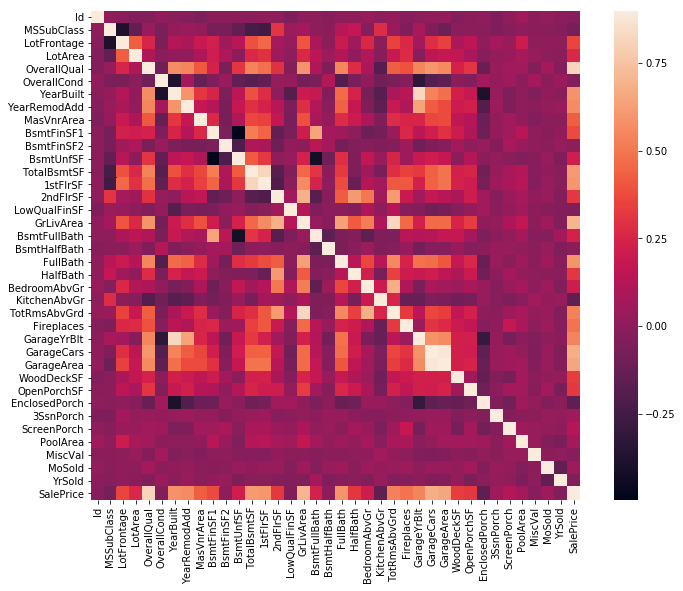

In [16]:
#correration matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=0.9, square=True)
# plt.show();

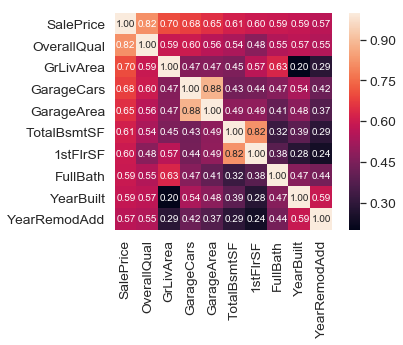

In [17]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


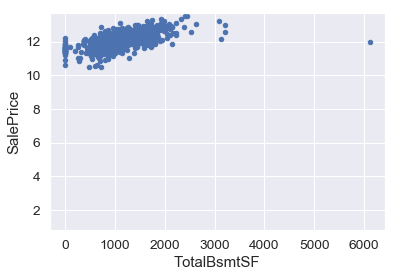

In [18]:
var ='TotalBsmtSF'
data = pd.concat([train['SalePrice'],train[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim =0.800000);
plt.show()

In [19]:
#Deleting Outliers of GrLivArea
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

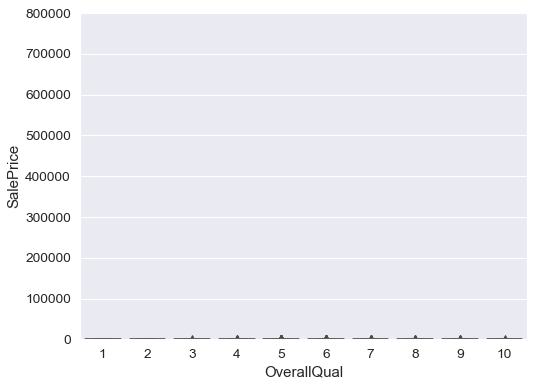

In [22]:
#box plot overallqual/salePrice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax =plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.show();